# **Prodigy InfoTech Task 3**

# Building a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data

# Importing the dependencies

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")


from matplotlib import rcParams
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

In [4]:
bank_data = pd.read_csv("Bank_Additional.csv")
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [5]:
bank_data.shape

(41188, 21)

In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
bank_data.duplicated().sum()

12

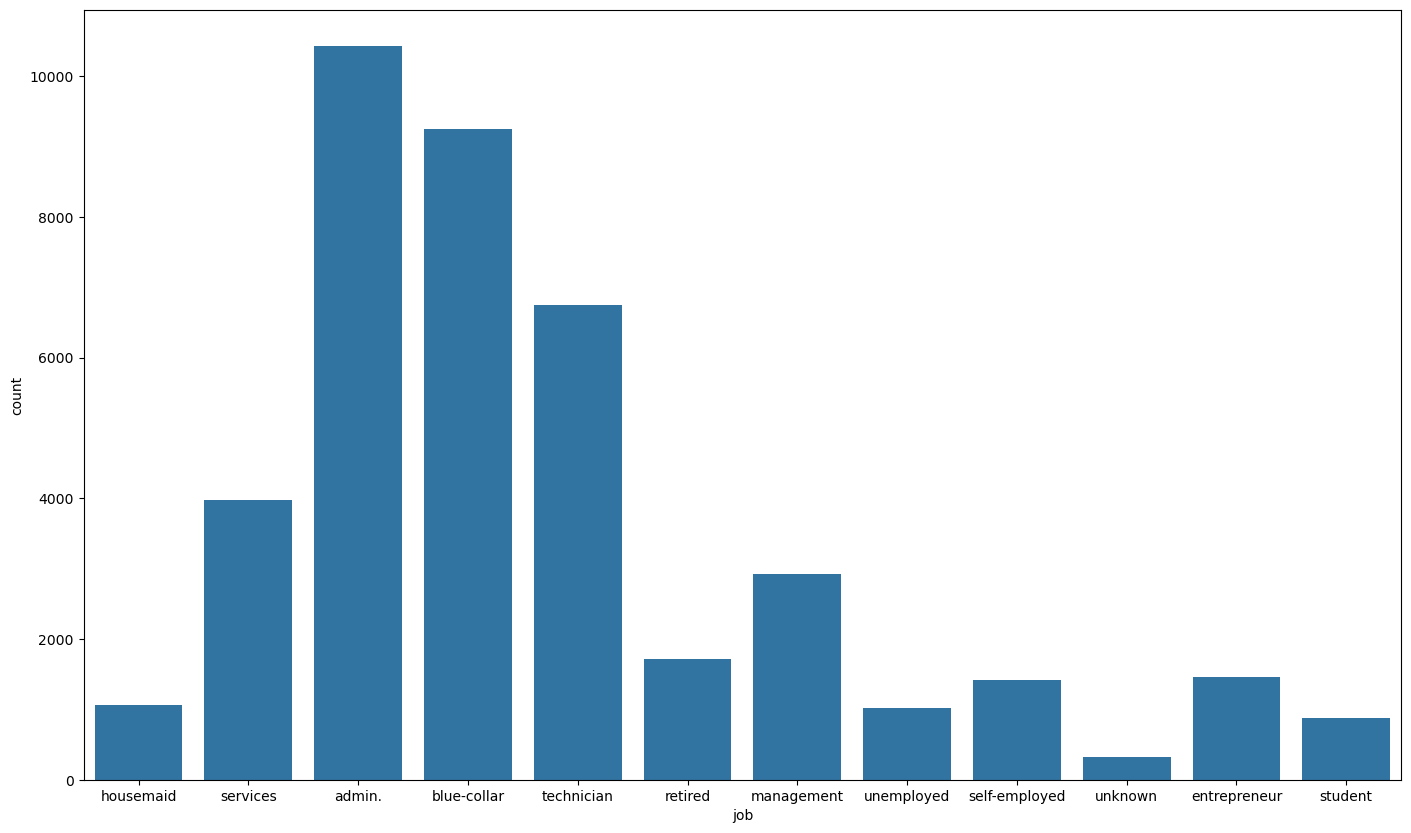

In [15]:
rcParams['figure.figsize'] = 17,10
sns.countplot(x=bank_data['job']);

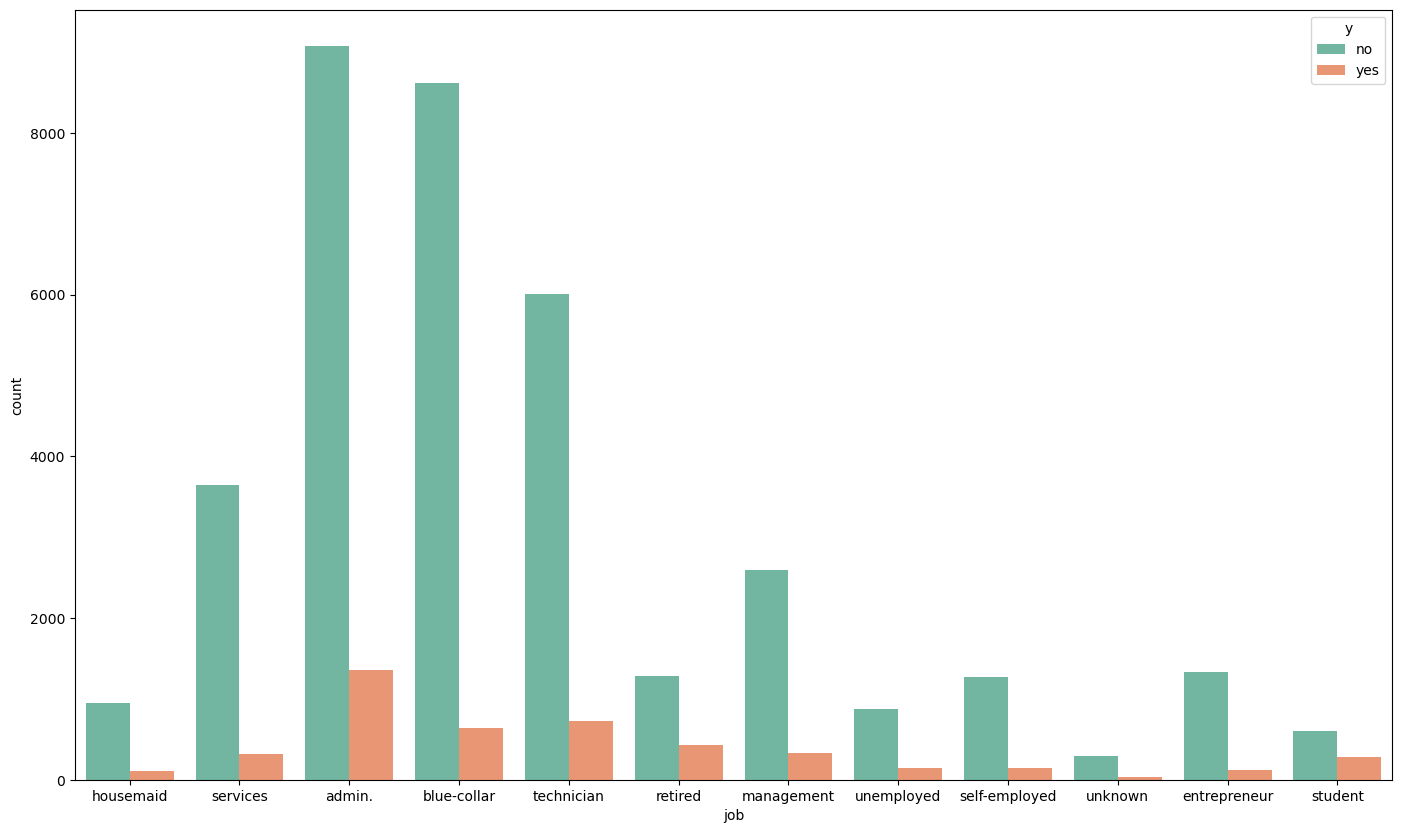

In [17]:
rcParams['figure.figsize'] = 17,10
sns.countplot(x=bank_data['job'],hue=bank_data['y'],palette="Set2");

# The visualization above shows that the admin and the blue-collar and the technician are mostly taking  the bank deposit as they are more people in number

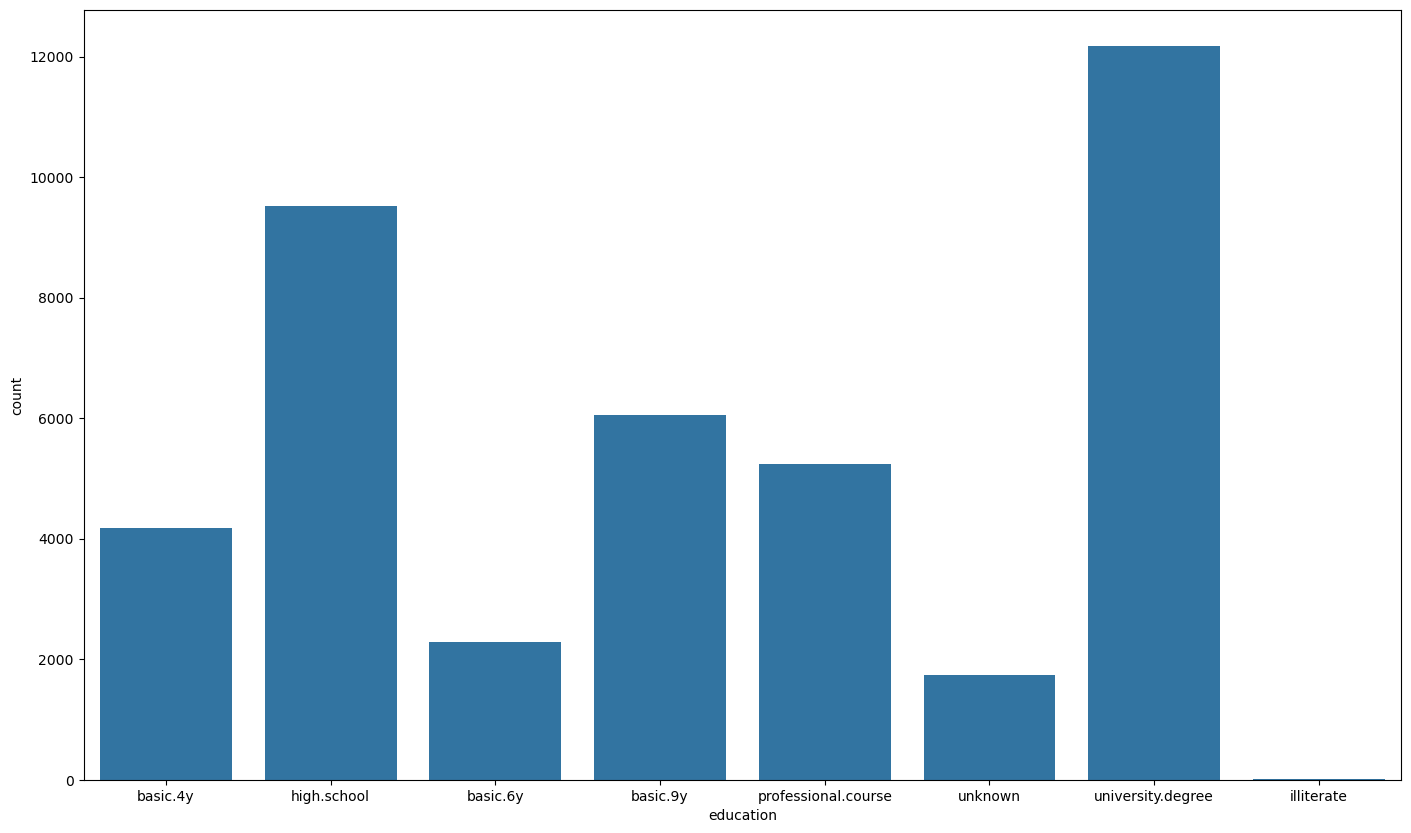

In [20]:
sns.countplot(x=bank_data["education"]);

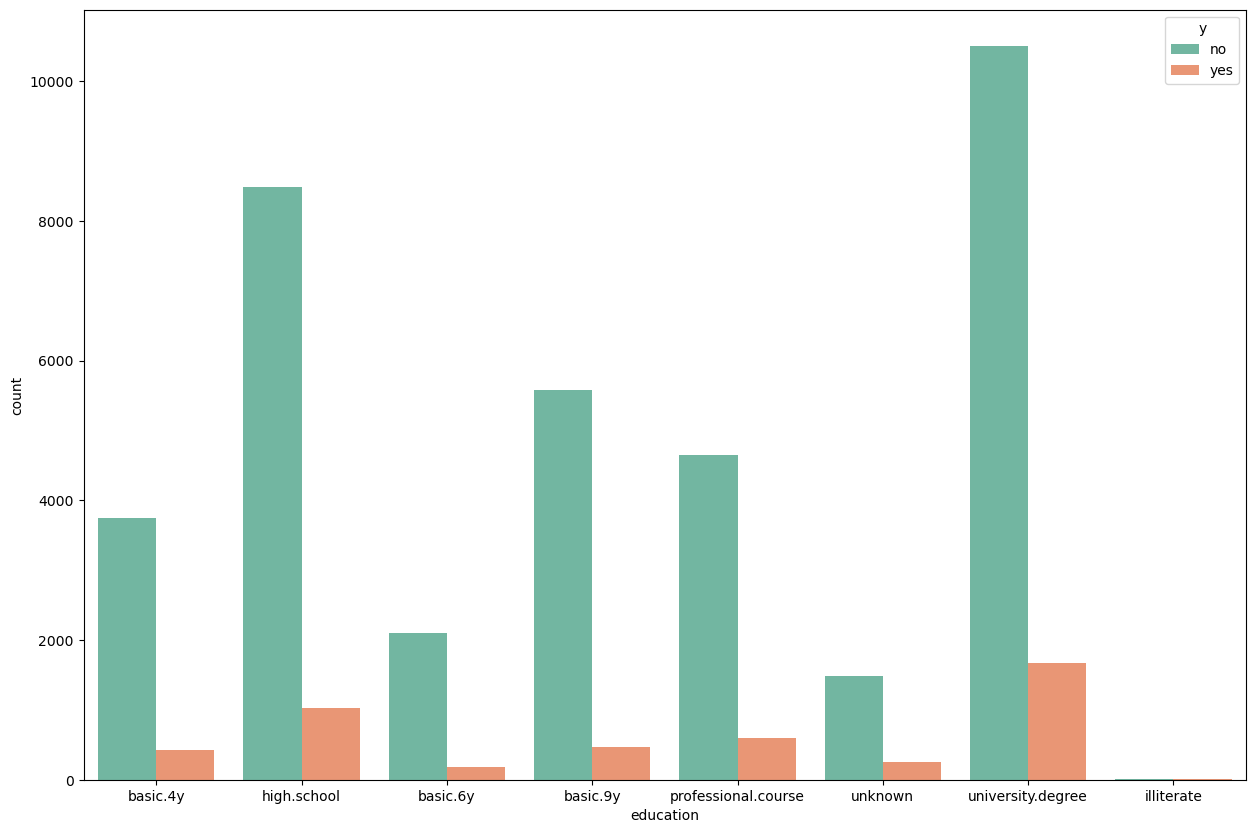

In [21]:
rcParams["figure.figsize"] = 15,10
sns.countplot(x=bank_data["education"], hue=bank_data["y"], palette = "Set2");

# Persons who have university degree and high school are getting the bank deposit based on the visualization above

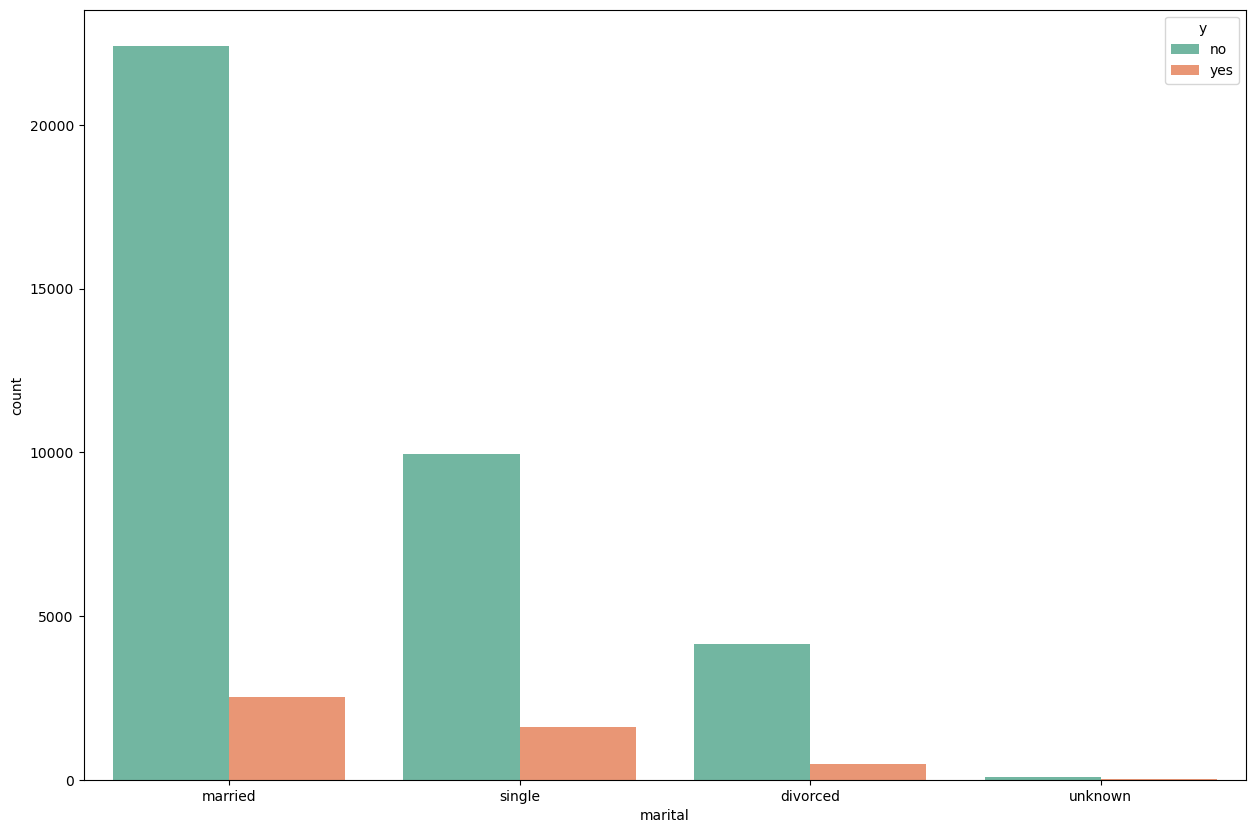

In [24]:
rcParams['figure.figsize'] = 15,10
sns.countplot(x=bank_data['marital'],hue=bank_data['y'],palette="Set2");

# Married and single people are accepting the bank deposit based on the visualization above

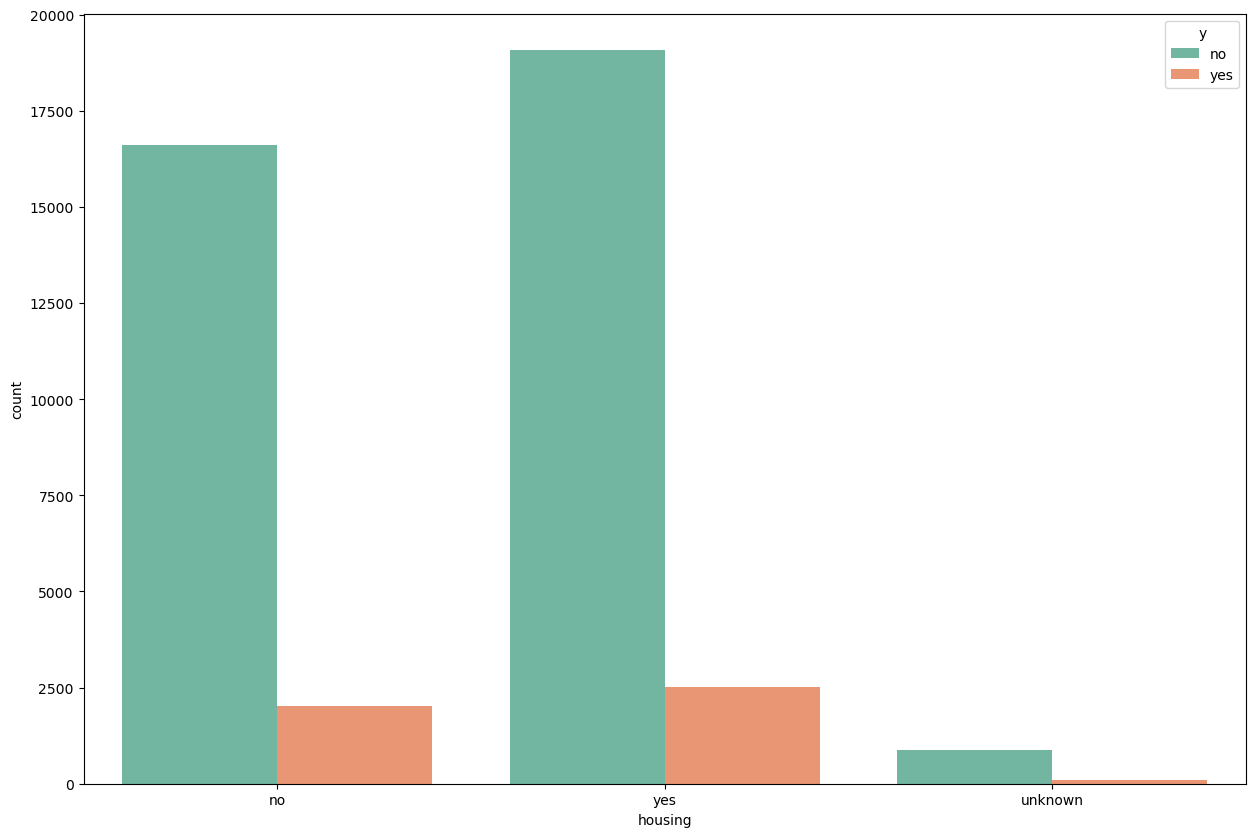

In [26]:
rcParams['figure.figsize'] = 15,10
sns.countplot(x=bank_data['housing'],hue=bank_data['y'],palette="Set2");

# The visualization above shows that those who have housing loan are more tend to accept the deposit

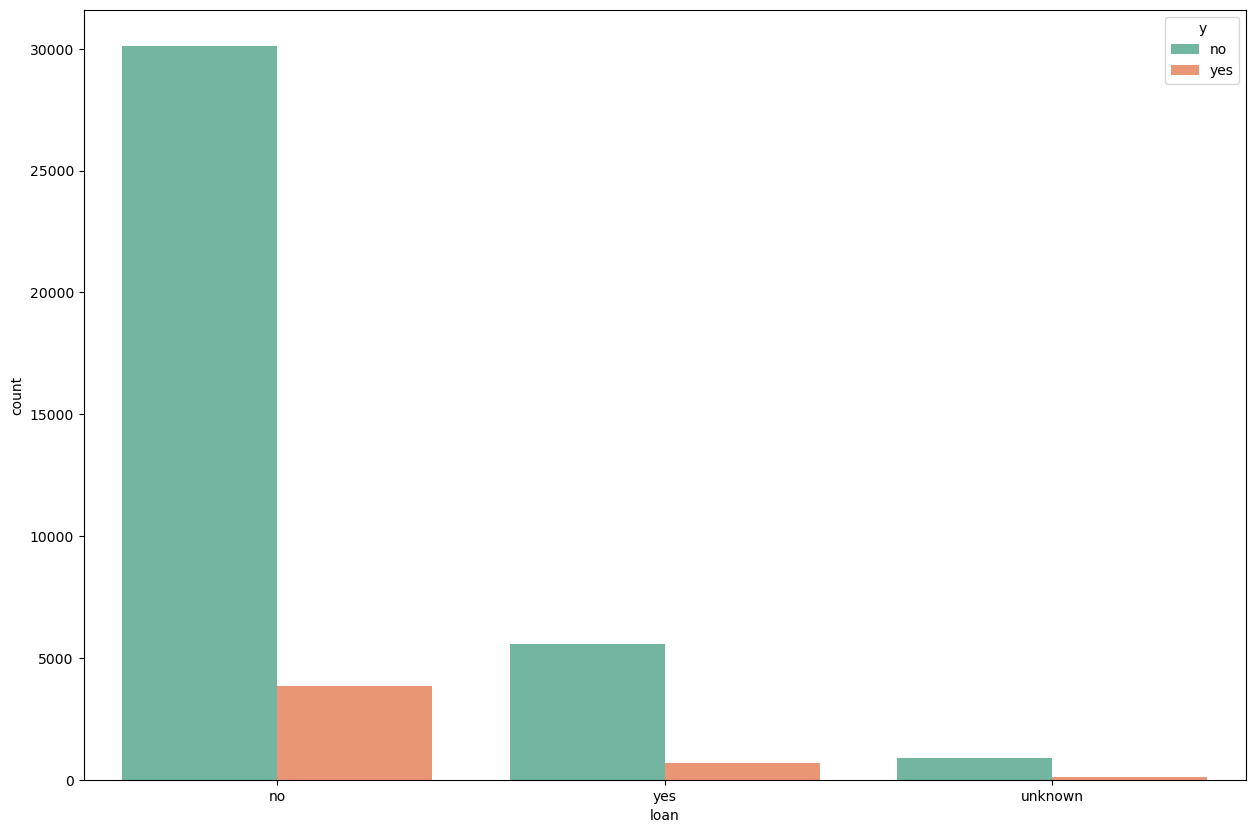

In [28]:
rcParams['figure.figsize'] = 15,10
sns.countplot(x=bank_data['loan'],hue=bank_data['y'],palette="Set2");

# The person who has no personal loan will subscribe the bank deposit and who has already a personal loan does not subscrip to the bank deposit

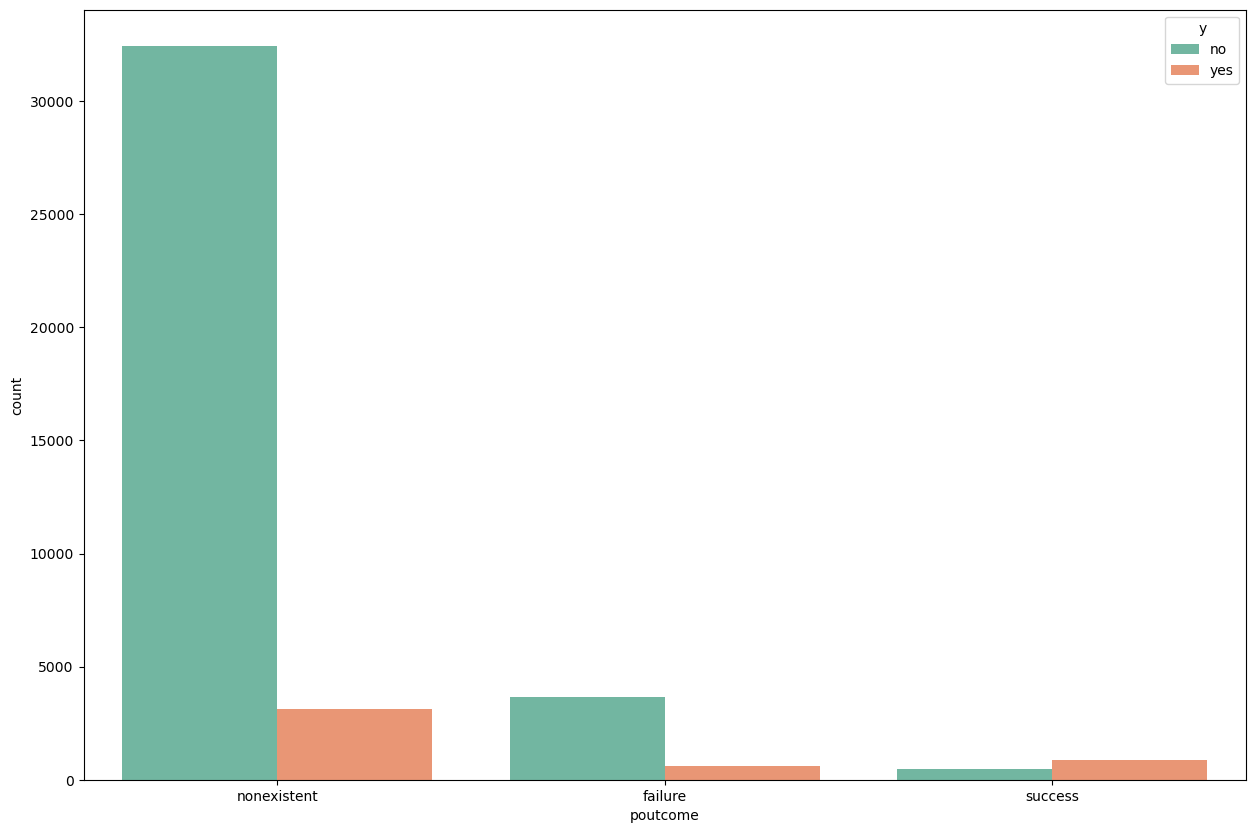

In [29]:
rcParams['figure.figsize'] = 15,10
sns.countplot(x=bank_data['poutcome'],hue=bank_data['y'],palette="Set2");

# Nonexistent people are more exposed for the subscription of the bank deposit

In [30]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [31]:
new_df = bank_data.copy(deep=True)

In [80]:
le = preprocessing.LabelEncoder()

# job
le.fit(new_df['job'])
new_df['job'] = le.transform(new_df['job'])

# maritial feature
le.fit(new_df['marital'])
new_df['marital'] = le.transform(new_df['marital'])

# education_feature
le.fit(new_df['education'])
new_df['education'] = le.transform(new_df['education'])

# housing_feature
le.fit(new_df['housing'])
new_df['housing'] = le.transform(new_df['housing'])

# loan_feature
le.fit(new_df['loan'])
new_df['loan'] = le.transform(new_df['loan'])

# contact_feature
le.fit(new_df['contact'])
new_df['contact'] = le.transform(new_df['contact'])

# Month_feature
le.fit(new_df['month'])
new_df['month'] = le.transform(new_df['month'])

# day of week_feature
le.fit(new_df['day_of_week'])
new_df['day_of_week'] = le.transform(new_df['day_of_week'])

# poutcome_feature
le.fit(new_df['poutcome'])
new_df['poutcome'] = le.transform(new_df['poutcome'])

# default_feature
le.fit(new_df['default'])
new_df['default'] = le.transform(new_df['default'])



# Target_feature
le.fit(new_df['y'])
new_df['y'] = le.transform(new_df['y'])



In [81]:
correlation_matrix = new_df.corr()

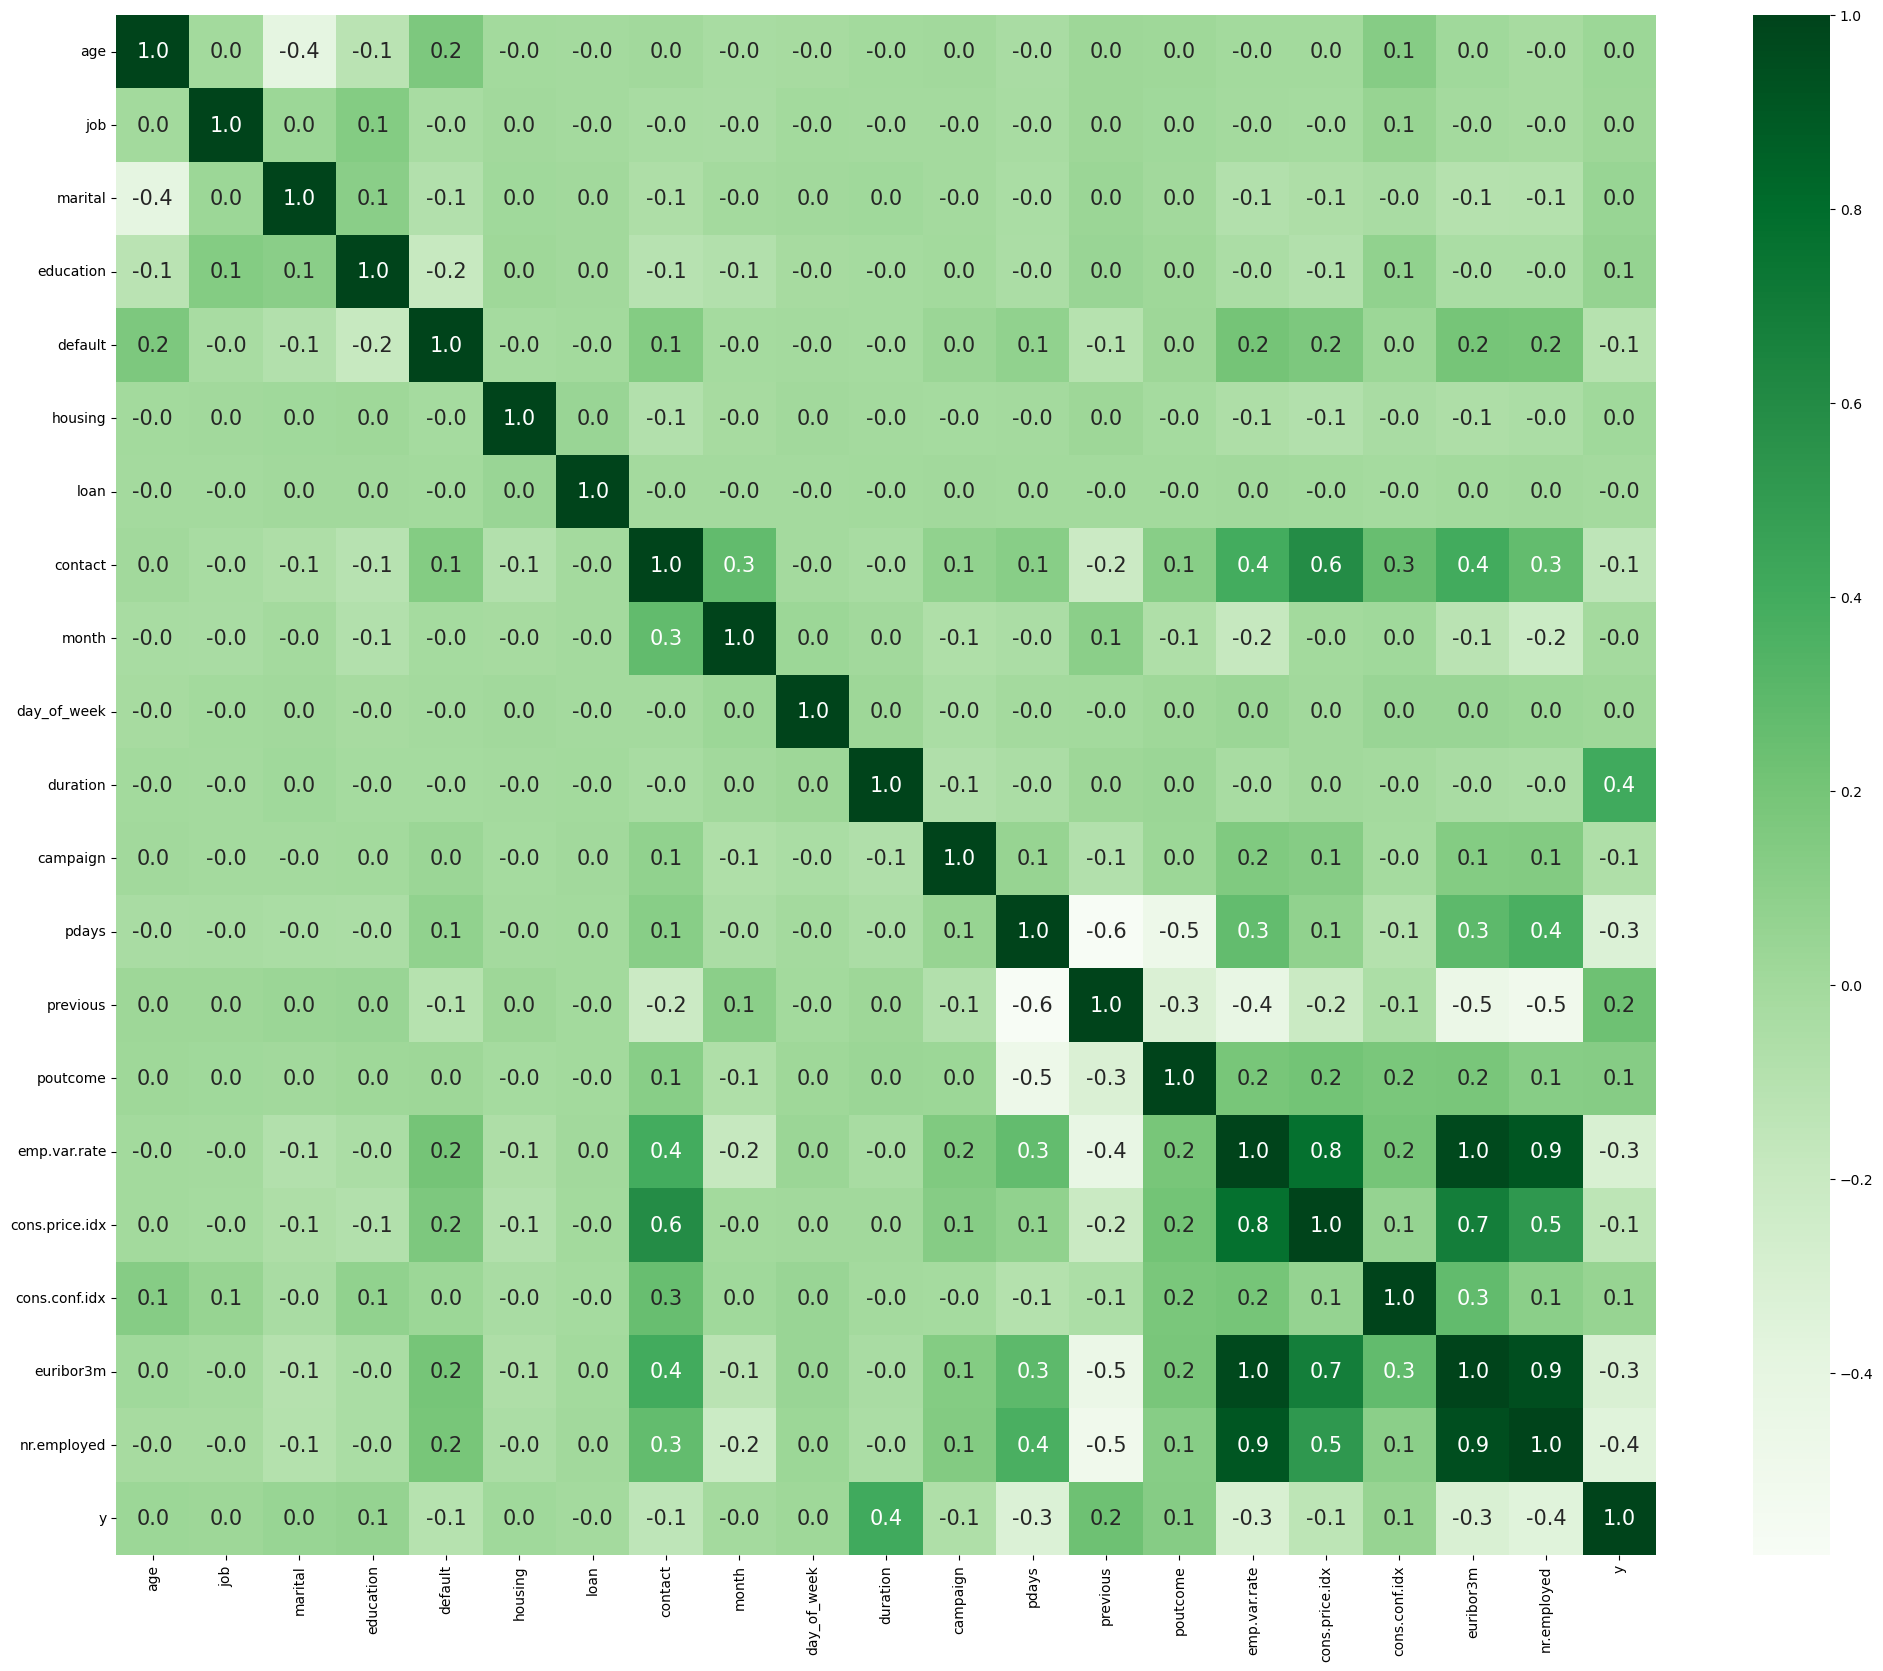

In [40]:
rcParams['figure.figsize'] = 25,20
sns.heatmap(correlation_matrix, cbar=True, square= True,fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens');

# From this corelation matrix we can find "emp.var.rate", "cons.proce.idx", "euribor3m" and "nr.employed" are more correlated to target columns based on the visualization above

In [82]:
 new_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0


In [87]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [83]:
y = new_df['y']

x = new_df.drop(['y'], axis=1)

In [96]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.1, random_state = 42)

In [97]:
clf = RandomForestClassifier()

In [98]:
clf.fit(x_train, y_train);

In [99]:
clf.score(x_train, y_train)

1.0

In [144]:
clf.score(x_test, y_test)

0.9128429230395727

In [100]:
y_preds = clf.predict(x_test)
y_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [106]:
y_prob = clf.predict_proba(x_test) 

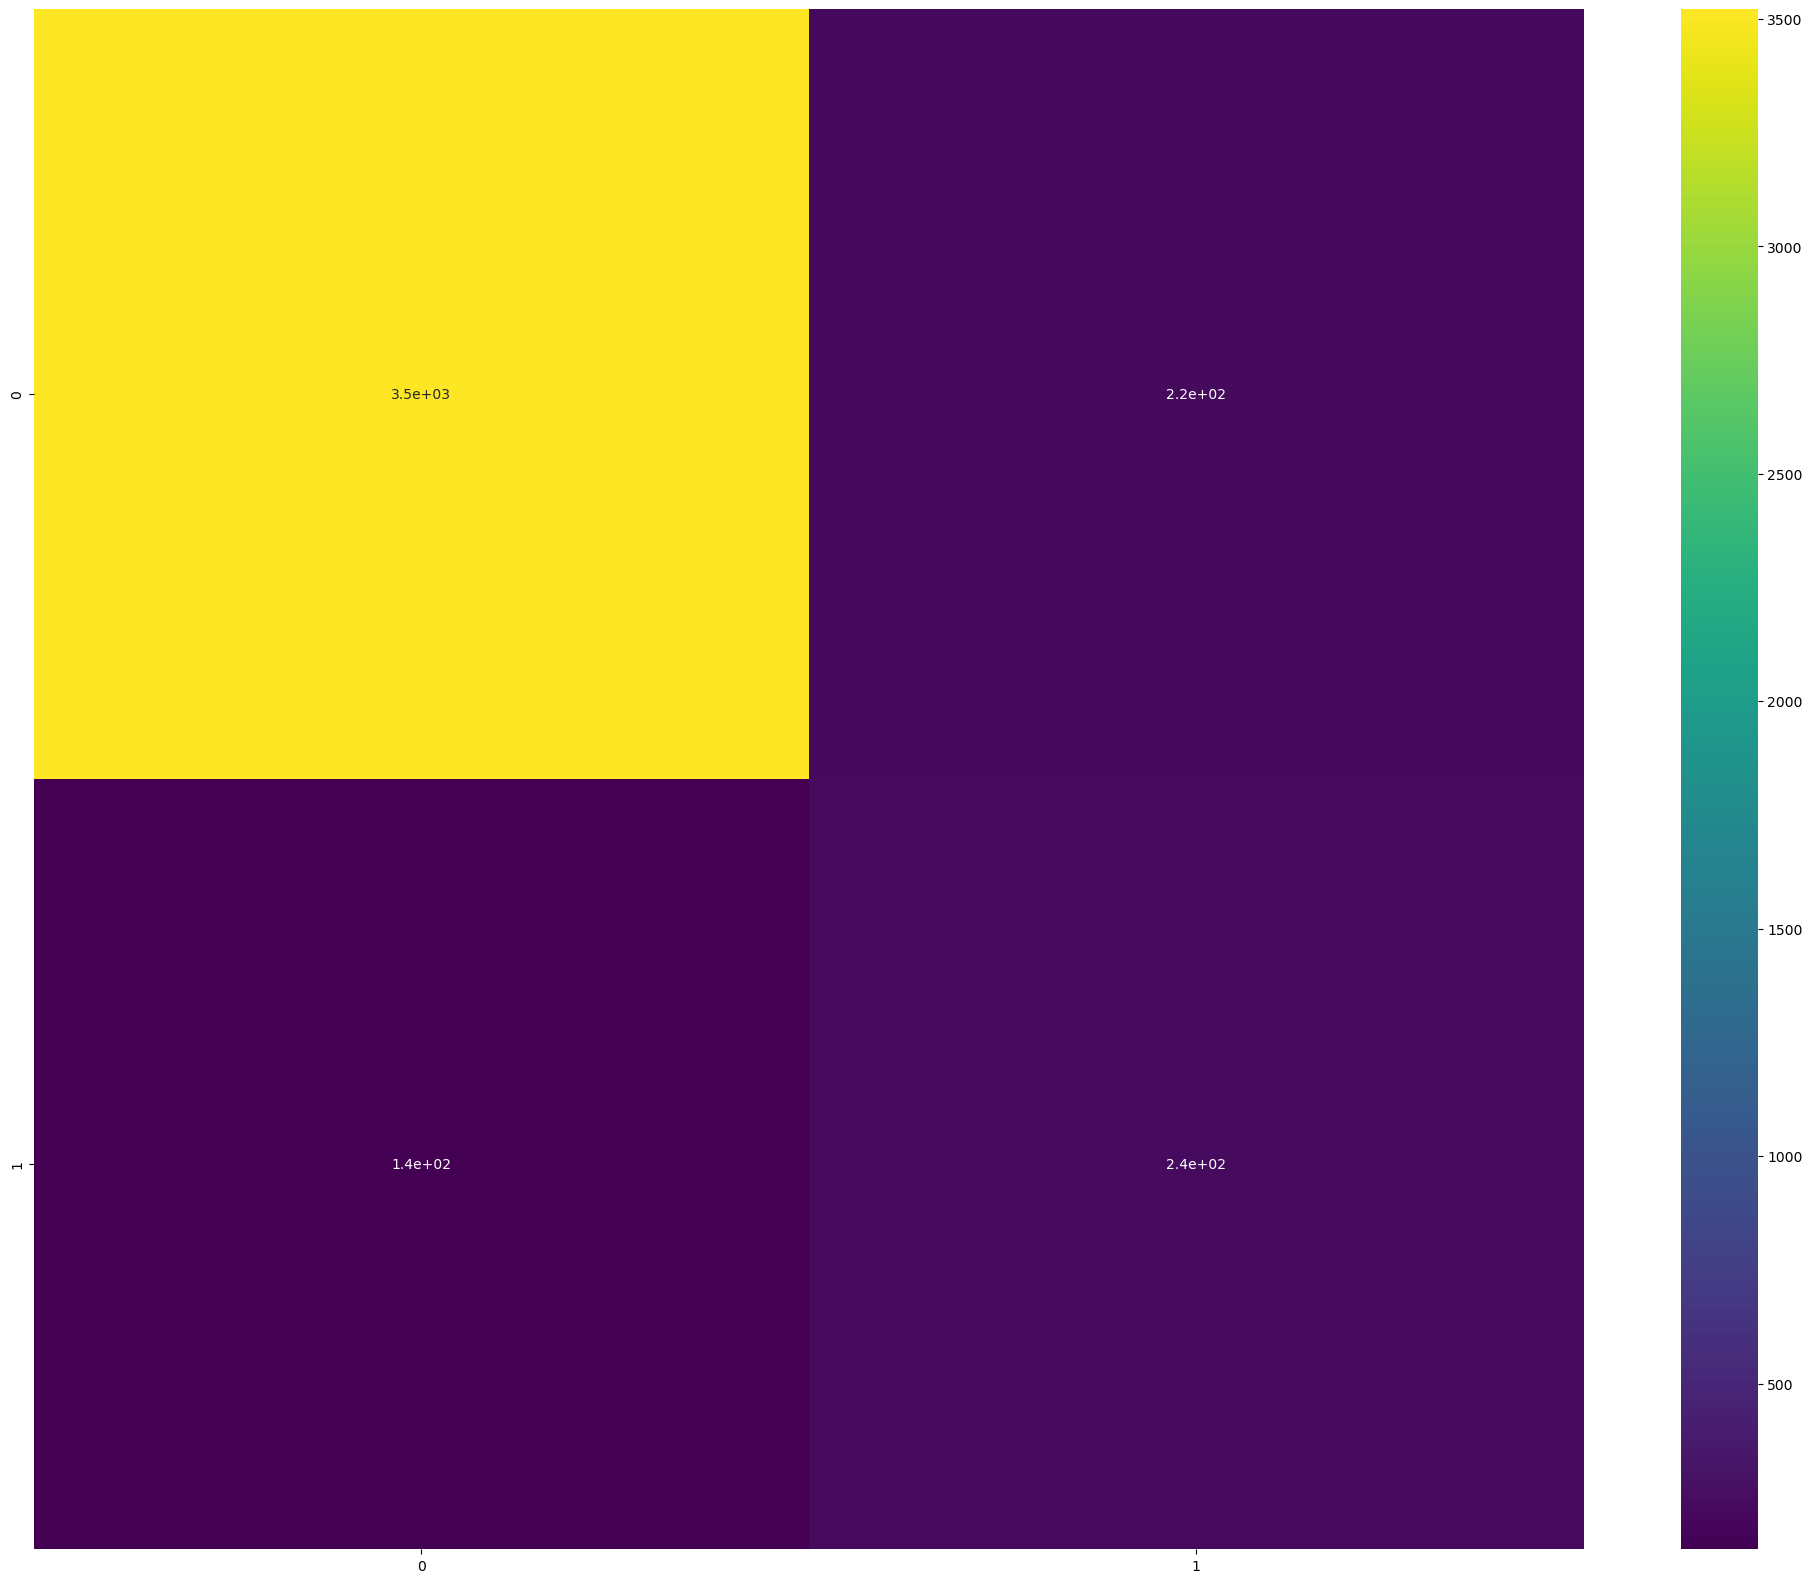

In [113]:
confusion = confusion_matrix(y_preds, y_test)
sns.heatmap(confusion, annot=True, cmap="viridis");

In [114]:
model = LogisticRegression()

In [118]:
model.fit(x_train, y_train);

In [139]:
model.score(x_train, y_train)

0.9080363646173353

In [142]:
model.score(x_test, y_test)

0.9123573682932751

In [120]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [122]:
model.predict_proba(x_test)

array([[0.83045994, 0.16954006],
       [0.96100508, 0.03899492],
       [0.963334  , 0.036666  ],
       ...,
       [0.84892811, 0.15107189],
       [0.90200489, 0.09799511],
       [0.9863123 , 0.0136877 ]])

In [127]:
 print(classification_report(y_preds, y_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      3744
           1       0.52      0.64      0.57       375

    accuracy                           0.91      4119
   macro avg       0.74      0.79      0.76      4119
weighted avg       0.92      0.91      0.92      4119



In [128]:
accuracy_score(y_preds, y_test)

0.9128429230395727

In [129]:
f1_score(y_preds, y_test)

0.5710872162485066

In [146]:
print(f"The accuracy_score is:{ accuracy_score(y_preds, y_test)*100:.2f}%")
print(f"The f1_score is:{ f1_score(y_preds, y_test)*100:.2f}%")
print(f"The LogisticRegression_score is:{model.score(x_test, y_test)*100:.2f}%")
print(f"The RandomForestClassifier_score is:{clf.score(x_test, y_test)*100:.2f}%")

The accuracy_score is:91.28%
The f1_score is:57.11%
The LogisticRegression_score is:91.24%
The RandomForestClassifier_score is:91.28%


In [147]:
new_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0


In [157]:
data = {"Customer_ID":y_test.index, "Probility to deposit":y_preds, "Deposit Probabilities":y_prob[:, 1]}
df = pd.DataFrame(data)
df

,Customer_ID,Probility to deposit,Deposit Probabilities
0,32884,0,0.09
1,3169,0,0.00
2,32206,0,0.00
3,9403,0,0.01
4,14020,0,0.00
...,...,...,...
4114,36295,1,0.51
4115,1553,0,0.00
4116,24928,0,0.24
4117,32493,0,0.02


In [158]:
df.to_csv('classification_deposit_report.csv', index=False)